In [87]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_AUG = pd.read_csv("apartments_pl_2023_08.csv")
data_SEP = pd.read_csv("apartments_pl_2023_09.csv")
data_OCT = pd.read_csv("apartments_pl_2023_10.csv")

# Analiza danych

Wyniki analizy danych (specyficzne dla konkretnego zbioru danych) standardowo powinny zawierać przynajmniej następujące elementy:
* liczba atrybutów i typy ich wartości
* liczba różnych wartości atrybutów, które nie są ciągłe (ze skończonego, niewielkiego zakresu)
* atrybut decyzyjny - charakterystyka
* brakujące wartości (z podziałem na obiekty i w ramach poszczególnych atrybutów warunkowych)
* duplikaty
* liczebności przykładów z poszczególnych klas
* współczynnik IR (imbalanced ratio)
* mapa korelacji atrybutów
* weryfikacja zasadności pozostawienia/usunięcia poszczególnych atrybutów na podstawie wiedzy dziedzinowej
* analiza (komentarze dodawane na bieżąco w notatniku)
* wnioski

In [3]:
print("data_AUG length: ", len(data_AUG))
print("data_SEP length: ", len(data_SEP))
print("data_OCT length: ", len(data_OCT))

data_AUG length:  18905
data_SEP length:  16997
data_OCT length:  16690


In [4]:
data_AUG.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [5]:
data_SEP.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,...,0.321,condominium,brick,NaN,no,yes,no,no,yes,799000
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
2,3b8819c6c9ffd55adfddfd5bafcc844d,szczecin,tenement,50.00,2.0,NaN,1.0,NaN,53.364400,14.660900,...,0.399,condominium,brick,NaN,yes,no,no,no,no,350000
3,708ccd264180315a4cfe6324ed4861d0,szczecin,blockOfFlats,55.19,2.0,1.0,2.0,2013.0,53.480364,14.541494,...,0.183,condominium,brick,premium,yes,yes,no,yes,yes,607000
4,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000


In [6]:
data_OCT.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
2,ede1c0d953ff85f3cd9676d39ca8f62d,szczecin,blockOfFlats,37.00,2.0,8.0,10.0,1970.0,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,yes,yes,429995
3,6c807c6c86a74c57a3fd4445a1f49a46,szczecin,apartmentBuilding,48.00,2.0,4.0,6.0,NaN,53.435461,14.570436,...,0.177,condominium,brick,NaN,no,yes,no,no,no,550000
4,bb14c9a540275da73f6cb6ed42e5c26c,szczecin,apartmentBuilding,55.19,2.0,1.0,2.0,2013.0,53.482094,14.542574,...,0.043,condominium,brick,premium,yes,yes,no,yes,yes,607000


In [116]:
# dane z poszczególnych miesięcy z pominięciem unikalnych ID
data_AUG_noid = data_AUG.drop(columns=["id"])
data_SEP_noid = data_SEP.drop(columns=["id"])
data_OCT_noid = data_OCT.drop(columns=["id"])

In [114]:
# złączenie plików z danymi
data_ALL = pd.concat([data_AUG, data_SEP, data_OCT], ignore_index=True)
# wszystkie dane z pominięciem unikalnych ID
data_ALL_noid = data_ALL.drop(columns=["id"])

In [8]:
data_ALL.sample(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
52076,4fdc33b9867176ac1a3fc9f1e92c0478,bydgoszcz,blockOfFlats,37.5,2.0,8.0,11.0,1978.0,53.121200,17.992500,...,0.300,condominium,concreteSlab,NaN,no,yes,yes,no,yes,360000
26137,934840ff1734b47f7fd0dc089ed568f8,wroclaw,apartmentBuilding,101.0,5.0,3.0,3.0,2003.0,51.136029,16.960340,...,0.458,condominium,brick,NaN,no,no,no,no,no,825000
35392,d8e48ced9a7d1f87a4814a3d8418749e,bydgoszcz,blockOfFlats,69.7,4.0,2.0,4.0,2023.0,53.133650,18.019910,...,0.063,condominium,NaN,NaN,no,yes,yes,yes,no,849000
29220,13e01a266e6ed6c59717c9e9c44ddc02,lublin,blockOfFlats,60.0,3.0,3.0,4.0,1980.0,51.268786,22.549315,...,0.044,condominium,concreteSlab,low,no,yes,no,no,no,498000
1305,4c601e6f05d38fbad3a43ff658e49330,gdynia,NaN,54.0,3.0,4.0,4.0,1974.0,54.536217,18.478709,...,0.518,condominium,NaN,NaN,no,yes,no,no,yes,489000


## Liczba atrybutów i typy ich wartości

In [57]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52592 entries, 0 to 52591
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52592 non-null  object 
 1   city                  52592 non-null  object 
 2   type                  40942 non-null  object 
 3   squareMeters          52592 non-null  float64
 4   rooms                 52592 non-null  float64
 5   floor                 43065 non-null  float64
 6   floorCount            51842 non-null  float64
 7   buildYear             43467 non-null  float64
 8   latitude              52592 non-null  float64
 9   longitude             52592 non-null  float64
 10  centreDistance        52592 non-null  float64
 11  poiCount              52592 non-null  float64
 12  schoolDistance        52542 non-null  float64
 13  clinicDistance        52340 non-null  float64
 14  postOfficeDistance    52519 non-null  float64
 15  kindergartenDistanc

### Sierpień

In [117]:
# TODO: Formatowanie liczb, moze warto ustawic globalnie

In [10]:
data_AUG.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,18905.000000,18905.000000,15467.000000,18643.000000,15634.000000,18905.000000,18905.000000,18905.000000,18905.000000,18891.000000,18817.000000,18880.000000,18892.000000,18847.000000,18340.000000,18878.000000,1.890500e+04
mean,58.509976,2.676752,3.339820,5.279783,1984.551043,52.020411,19.516394,4.398444,20.099656,0.414897,1.002196,0.518748,0.371033,0.356646,1.460047,0.364134,6.925592e+05
std,21.060168,0.903619,2.549141,3.333666,33.767929,1.353998,1.769053,2.857387,23.513874,0.472782,0.913721,0.506783,0.452338,0.475884,1.102847,0.469334,3.443890e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.005000,0.001000,0.004000,0.001000,0.006000,0.003000,1.500000e+05
25%,44.200000,2.000000,2.000000,3.000000,1967.000000,51.109100,18.536220,2.070000,7.000000,0.175000,0.367000,0.237000,0.158000,0.118500,0.592000,0.145000,4.588000e+05
50%,54.400000,3.000000,3.000000,4.000000,1990.000000,52.193604,19.908944,4.010000,13.000000,0.288000,0.700000,0.387000,0.264000,0.235000,1.140000,0.239000,6.200000e+05
75%,68.200000,3.000000,4.000000,6.000000,2014.000000,52.412561,20.992010,6.180000,23.000000,0.466500,1.286000,0.621000,0.415000,0.417000,2.107000,0.405000,8.300000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.583210,23.207128,16.940000,208.000000,4.818000,4.996000,4.967000,4.960000,4.985000,4.998000,4.992000,2.500000e+06


### Wrzesień

In [11]:
data_SEP.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,16997.000000,16997.000000,13954.000000,16751.000000,14048.000000,16997.000000,16997.000000,16997.000000,16997.000000,16982.000000,16918.000000,16974.000000,16983.000000,16954.000000,16495.000000,16974.000000,1.699700e+04
mean,59.033912,2.689357,3.327576,5.237538,1984.351936,52.066227,19.528680,4.347108,20.345590,0.418712,0.988139,0.524299,0.378864,0.359300,1.451509,0.370333,7.080972e+05
std,21.362743,0.916103,2.532150,3.305643,34.041196,1.331268,1.790088,2.893583,23.710083,0.482618,0.911026,0.516412,0.467429,0.487905,1.109576,0.483060,3.519888e+05
min,25.000000,1.000000,1.000000,1.000000,1851.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.005000,0.003000,0.002000,0.001000,0.007000,0.001000,1.549000e+05
25%,44.500000,2.000000,2.000000,3.000000,1965.000000,51.120355,18.529520,1.960000,6.000000,0.175000,0.359000,0.237000,0.158000,0.116000,0.583000,0.146000,4.650000e+05
50%,55.190000,3.000000,3.000000,4.000000,1991.000000,52.197569,19.903611,3.930000,13.000000,0.292000,0.681000,0.391000,0.268000,0.234000,1.122000,0.240000,6.390000e+05
75%,69.000000,3.000000,4.000000,6.000000,2014.000000,52.450200,20.998580,6.150000,24.000000,0.469000,1.266000,0.629000,0.423000,0.418000,2.077500,0.411000,8.500000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.207128,16.920000,208.000000,4.818000,4.989000,4.905000,4.960000,4.985000,5.000000,4.861000,2.500000e+06


### Październik

In [12]:
data_OCT.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,16690.000000,16690.000000,13644.000000,16448.000000,13785.000000,16690.000000,16690.000000,16690.000000,16690.000000,16669.000000,16605.000000,16665.000000,16668.000000,16637.000000,16185.000000,16661.000000,1.669000e+04
mean,58.985279,2.680228,3.268030,5.162755,1984.573957,52.047413,19.489039,4.328341,20.462912,0.417843,0.978049,0.526101,0.376593,0.357309,1.444789,0.365081,7.235462e+05
std,21.347723,0.911191,2.455211,3.201862,34.164553,1.331076,1.779749,2.879183,24.104101,0.480638,0.905555,0.515941,0.463518,0.483880,1.105216,0.476461,3.521544e+05
min,25.000000,1.000000,1.000000,1.000000,1851.000000,49.981357,14.447127,0.020000,0.000000,0.005000,0.001000,0.003000,0.002000,0.001000,0.007000,0.001000,1.526200e+05
25%,44.402500,2.000000,2.000000,3.000000,1965.000000,51.114060,18.512167,1.970000,7.000000,0.175000,0.355000,0.241000,0.157000,0.117000,0.586000,0.145000,4.800000e+05
50%,55.000000,3.000000,3.000000,4.000000,1992.000000,52.195677,19.894169,3.920000,13.000000,0.292000,0.674000,0.395000,0.266000,0.235000,1.119000,0.242000,6.590000e+05
75%,69.000000,3.000000,4.000000,6.000000,2015.000000,52.440733,20.994512,6.090000,24.000000,0.468000,1.246000,0.629000,0.423000,0.419000,2.051000,0.407000,8.700000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.195701,16.920000,208.000000,4.818000,4.989000,4.905000,4.960000,4.985000,5.000000,4.861000,2.500000e+06


### Dane złączone

In [13]:
data_ALL.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,52592.000000,52592.000000,43065.000000,51842.000000,43467.000000,52592.000000,52592.000000,52592.000000,52592.000000,52542.000000,52340.000000,52519.000000,52543.000000,52438.000000,51020.000000,52513.000000,5.259200e+04
mean,58.830142,2.681929,3.313108,5.229004,1984.493961,52.043787,19.511684,4.359606,20.294417,0.417065,0.989992,0.522876,0.375328,0.357714,1.452446,0.366438,7.074146e+05
std,21.250642,0.910070,2.514338,3.283571,33.981805,1.339533,1.779307,2.876144,23.765901,0.478467,0.910303,0.512821,0.460811,0.482326,1.105774,0.476065,3.495542e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,0.001000,1.500000e+05
25%,44.360000,2.000000,2.000000,3.000000,1965.000000,51.114060,18.527700,2.010000,7.000000,0.175000,0.360000,0.238000,0.158000,0.117000,0.587000,0.145000,4.680000e+05
50%,55.000000,3.000000,3.000000,4.000000,1991.000000,52.195252,19.902880,3.960000,13.000000,0.290000,0.685000,0.390000,0.266000,0.235000,1.124000,0.240000,6.390000e+05
75%,69.000000,3.000000,4.000000,6.000000,2014.000000,52.436800,20.994660,6.140000,24.000000,0.468000,1.270000,0.628000,0.420000,0.418000,2.076000,0.407000,8.500000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.207128,16.940000,208.000000,4.818000,4.996000,4.967000,4.960000,4.985000,5.000000,4.992000,2.500000e+06


## Liczba różnych wartości atrybutów, które nie są ciągłe (ze skończonego, niewielkiego zakresu)

In [58]:
def get_unique_count(data_frame):
    temp = []
    for column in data_frame.columns.values:
        temp.append([column, len(data_frame[column].unique())])
        
    unique = pd.DataFrame(np.array(temp), columns=["attribute", "unique"])
    return unique

### Liczba Unikalnych wartości dla poszczególnych kolumn - wszystkie dane

In [119]:
unique_value_counts = get_unique_count(data_ALL)
unique_value_counts

,attribute,unique
0,id,32027
1,city,15
2,type,4
3,squareMeters,5175
4,rooms,6
5,floor,25
6,floorCount,30
7,buildYear,158
8,latitude,20723
9,longitude,21215


In [125]:
# TODO: odfiltrować to co ma za duzo wartosci, bo podpunkt prosi tylko o ilosc
# unique_value_counts[unique_value_counts["unique"] < 40]

In [19]:
# TODO: prawdopodobnie wszystko co ma liczność powyżej setek będzie tutaj do wycięcia, 
# bo mają być nieciągłe atrybuty. Będzie można po prostu zrobić tablicę z nazwami kolumn i 
# wyświetlić tylko te, które są potrzebne

## Atrybut decyzyjny - charakterystyka

In [63]:
price_AUG = data_AUG["price"].rename("price_AUG")
price_SEP = data_SEP["price"].rename("price_SEP")
price_OCT = data_OCT["price"].rename("price_OCT")
price_ALL = data_ALL["price"].rename("price_ALL")

In [64]:
# porównanie statystyk cen z poszczególnych miesięcy
pd.concat([
        price_AUG.describe().map(int), 
        price_SEP.describe().map(int), 
        price_OCT.describe().map(int),
        price_ALL.describe().map(int)
    ],
    axis=1
)

,price_AUG,price_SEP,price_OCT,price_ALL
count,18905,16997,16690,52592
mean,692559,708097,723546,707414
std,344389,351988,352154,349554
min,150000,154900,152620,150000
25%,458800,465000,480000,468000
50%,620000,639000,659000,639000
75%,830000,850000,870000,850000
max,2500000,2500000,2500000,2500000


In [ ]:
price_ALL.value_counts()

599000     790
699000     718
799000     575
499000     574
650000     542
          ... 
799990       1
1083269      1
547200       1
829800       1
239900       1
Name: price_ALL, Length: 3859, dtype: int64

In [ ]:
len(price_ALL.unique())

3859

<Axes: title={'center': 'Price'}, xlabel='PLN', ylabel='Count'>

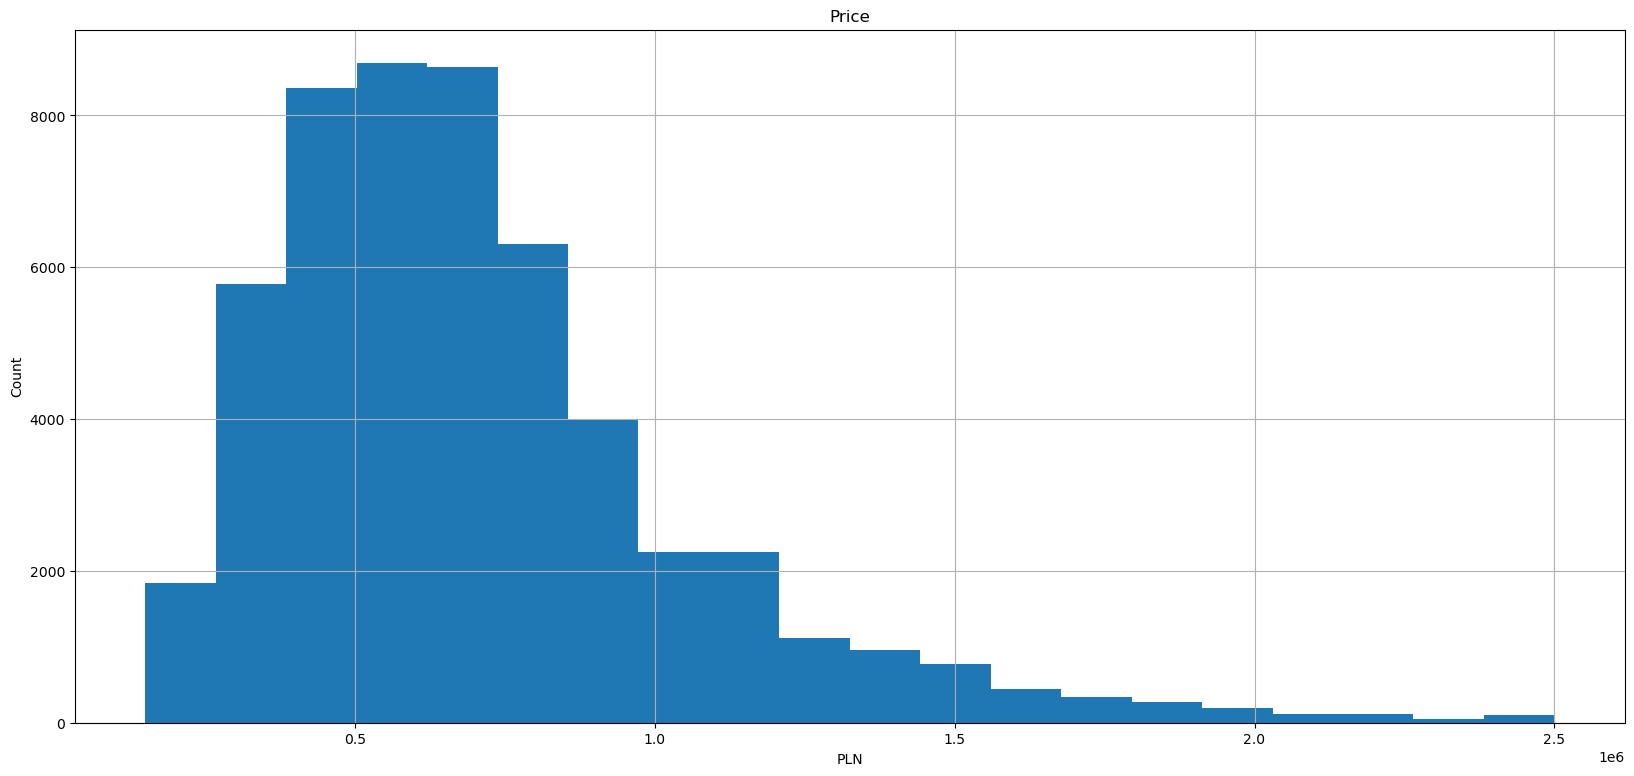

In [ ]:
price_hist = price_ALL.hist(bins=20, figsize=(20,9))
price_hist.set_title("Price")
price_hist.set_xlabel("PLN")
price_hist.set_ylabel("Count")
price_hist.locator_params(integer=True)
price_hist

W połączonych zbiorach danych występuje 3859 różnych wartości zmiennej klasyfikującej. Najczęsciej występującą wartością jest 599000.

## Brakujące wartości (z podziałem na obiekty i w ramach poszczególnych atrybutów warunkowych)

### Ilość brakujących danych w kolumnach

In [71]:
pd.concat([
        data_AUG.isna().sum(),
        data_SEP.isna().sum(),
        data_OCT.isna().sum(),
        data_ALL.isna().sum(),
    ],
    axis=1
)

,0,1,2,3
id,0,0,0,0
city,0,0,0,0
type,4039,3826,3785,11650
squareMeters,0,0,0,0
rooms,0,0,0,0
floor,3438,3043,3046,9527
floorCount,262,246,242,750
buildYear,3271,2949,2905,9125
latitude,0,0,0,0
longitude,0,0,0,0


### Liczba wierszy z brakującymi danymi w przynajmniej 1 kolumnie

In [78]:
pd.DataFrame({
    'AUG': data_AUG.isna().any(axis=1).sum(),
    'SEP': data_SEP.isna().any(axis=1).sum(),
    'OCT': data_OCT.isna().any(axis=1).sum(),
    'ALL': data_ALL.isna().any(axis=1).sum(),
}, index=["n/a #"])

,AUG,SEP,OCT,ALL
n/a #,16760,15079,14731,46570


## Duplikaty

### Duplikaty w danych z miesiąca sierpień

In [28]:
data_AUG.loc[data_ALL.duplicated()]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price


### Duplikaty w danych z miesiąca wrzesień

In [29]:
data_SEP.loc[data_ALL.duplicated()]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price


### Duplikaty w danych z miesiąca październik

In [30]:
data_OCT.loc[data_ALL.duplicated()]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price


### Duplikaty w danych połączonych

In [31]:
duplicates_ALL = data_ALL.loc[data_ALL.duplicated()]
duplicates_ALL.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
18905,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,...,0.321,condominium,brick,NaN,no,yes,no,no,yes,799000
18906,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000
18909,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
18912,eb15c0a8a7f16a523f5cf5f61de06638,szczecin,blockOfFlats,49.50,2.0,1.0,4.0,1980.0,53.365833,14.661389,...,0.236,cooperative,NaN,low,no,yes,no,no,yes,462000
18922,209a6d2dea99216bdf83a968343cd3b3,szczecin,tenement,61.48,2.0,NaN,3.0,1900.0,53.491508,14.606985,...,1.521,condominium,brick,premium,no,no,no,no,yes,390000


In [32]:
len(duplicates_ALL)

17360

In [33]:
aug_test = data_AUG.drop(columns=["id"])
len(aug_test.loc[aug_test.duplicated()])

200

In [34]:
aug_test2 = data_AUG.drop(columns=["id", "price"])
len(aug_test2.loc[aug_test2.duplicated()])

241

In [106]:
data_AUG.loc[aug_test.duplicated()].head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
68,4e679733445ed71e835415cc1501ea39,szczecin,tenement,101.00,3.0,3.0,4.0,1930.0,53.431078,14.532763,...,0.186,condominium,brick,premium,no,yes,no,no,yes,559000
211,0457321a89c6f6413886f5095a5be635,szczecin,NaN,48.16,2.0,3.0,4.0,NaN,53.424180,14.548586,...,0.126,condominium,brick,NaN,no,no,no,no,no,339000
213,58b0d9314ca0f06298f2e69571f57e36,szczecin,NaN,31.00,1.0,NaN,4.0,1986.0,53.395814,14.525907,...,0.264,cooperative,concreteSlab,NaN,no,yes,no,no,no,285000
291,5e55fff04ee7488dc2c3d6d85cd7ab36,szczecin,blockOfFlats,76.00,4.0,NaN,2.0,2023.0,53.428544,14.552812,...,0.085,condominium,NaN,NaN,yes,yes,no,no,no,480000
369,eb9e63d8bc6dc1db2d436fe7d06d324c,szczecin,NaN,53.00,2.0,3.0,4.0,1930.0,53.445704,14.522719,...,0.499,condominium,brick,premium,no,yes,no,no,no,499000


In [108]:
data_AUG.loc[aug_test.duplicated()].head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
68,4e679733445ed71e835415cc1501ea39,szczecin,tenement,101.00,3.0,3.0,4.0,1930.0,53.431078,14.532763,...,0.186,condominium,brick,premium,no,yes,no,no,yes,559000
211,0457321a89c6f6413886f5095a5be635,szczecin,NaN,48.16,2.0,3.0,4.0,NaN,53.424180,14.548586,...,0.126,condominium,brick,NaN,no,no,no,no,no,339000
213,58b0d9314ca0f06298f2e69571f57e36,szczecin,NaN,31.00,1.0,NaN,4.0,1986.0,53.395814,14.525907,...,0.264,cooperative,concreteSlab,NaN,no,yes,no,no,no,285000
291,5e55fff04ee7488dc2c3d6d85cd7ab36,szczecin,blockOfFlats,76.00,4.0,NaN,2.0,2023.0,53.428544,14.552812,...,0.085,condominium,NaN,NaN,yes,yes,no,no,no,480000
369,eb9e63d8bc6dc1db2d436fe7d06d324c,szczecin,NaN,53.00,2.0,3.0,4.0,1930.0,53.445704,14.522719,...,0.499,condominium,brick,premium,no,yes,no,no,no,499000


In [38]:
id_list = data_AUG.loc[aug_test.duplicated()].index.values.tolist()

In [111]:
# Te duplikaty (41) pojawiają się tylko wtedy, gdy pominięte zostaną ID oraz price.
data_AUG.loc[aug_test2.duplicated()].drop(index=id_list).head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
261,a766fe7cac8e590474f6886406d1a113,szczecin,NaN,68.20,3.0,1.0,1.0,NaN,53.477000,14.526000,...,1.239,condominium,NaN,NaN,no,no,no,no,no,590000
277,8eaa13f823df45ea8c05fc988da8dede,szczecin,NaN,60.64,3.0,NaN,4.0,1980.0,53.426960,14.537907,...,0.036,condominium,concreteSlab,premium,no,yes,no,no,no,429000
493,531963434cdda4a34d941cc51b1e42de,szczecin,tenement,70.00,3.0,1.0,3.0,1936.0,53.427926,14.540466,...,0.149,condominium,brick,low,no,no,no,no,yes,395000
510,fed5540a2eed16acd1d4f9ebda6db993,szczecin,blockOfFlats,76.64,3.0,2.0,4.0,1990.0,53.426320,14.531440,...,0.048,condominium,brick,premium,no,yes,no,no,yes,749000
778,3f66f710bf46cf4212ae9f302cc714af,gdynia,apartmentBuilding,54.10,3.0,3.0,3.0,2019.0,54.502670,18.541950,...,0.076,condominium,brick,NaN,no,yes,yes,no,no,990000


In [40]:
sep_test = data_SEP.drop(columns=["id"])
len(sep_test.loc[sep_test.duplicated()])

175

In [41]:
sep_test2 = data_SEP.drop(columns=["id", "price"])
len(sep_test2.loc[sep_test2.duplicated()])

206

In [43]:
oct_test = data_OCT.drop(columns=["id"])
len(oct_test.loc[oct_test.duplicated()])

152

In [44]:
oct_test2 = data_OCT.drop(columns=["id", "price"])
len(oct_test2.loc[oct_test2.duplicated()])

173

In [46]:
test = data_ALL.drop(columns=["price"])
test.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,1.857,0.280,condominium,brick,NaN,no,no,no,no,no
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no


In [47]:
test.loc[test.duplicated()].head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
18905,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,...,0.388,0.321,condominium,brick,NaN,no,yes,no,no,yes
18906,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.465,0.073,cooperative,NaN,NaN,no,no,yes,no,no
18909,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,1.857,0.280,condominium,brick,NaN,no,no,no,no,no
18912,eb15c0a8a7f16a523f5cf5f61de06638,szczecin,blockOfFlats,49.50,2.0,1.0,4.0,1980.0,53.365833,14.661389,...,NaN,0.236,cooperative,NaN,low,no,yes,no,no,yes
18922,209a6d2dea99216bdf83a968343cd3b3,szczecin,tenement,61.48,2.0,NaN,3.0,1900.0,53.491508,14.606985,...,3.720,1.521,condominium,brick,premium,no,no,no,no,yes


In [48]:
len(test.loc[test.duplicated()])

19723

In [49]:
test2 = data_ALL.drop(columns=["id"])
test2.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [50]:
test2.loc[test2.duplicated()].head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
68,szczecin,tenement,101.00,3.0,3.0,4.0,1930.0,53.431078,14.532763,2.05,...,0.186,condominium,brick,premium,no,yes,no,no,yes,559000
211,szczecin,NaN,48.16,2.0,3.0,4.0,NaN,53.424180,14.548586,0.82,...,0.126,condominium,brick,NaN,no,no,no,no,no,339000
213,szczecin,NaN,31.00,1.0,NaN,4.0,1986.0,53.395814,14.525907,3.85,...,0.264,cooperative,concreteSlab,NaN,no,yes,no,no,no,285000
291,szczecin,blockOfFlats,76.00,4.0,NaN,2.0,2023.0,53.428544,14.552812,0.79,...,0.085,condominium,NaN,NaN,yes,yes,no,no,no,480000
369,szczecin,NaN,53.00,2.0,3.0,4.0,1930.0,53.445704,14.522719,3.55,...,0.499,condominium,brick,premium,no,yes,no,no,no,499000


In [51]:
len(test2.loc[test2.duplicated()])

18632

In [52]:
test3 = data_ALL.drop(columns=["id", "price"])
test3.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes
1,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes
2,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,1.857,0.280,condominium,brick,NaN,no,no,no,no,no
3,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes
4,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no


In [53]:
test3.loc[test3.duplicated()].head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
68,szczecin,tenement,101.00,3.0,3.0,4.0,1930.0,53.431078,14.532763,2.05,...,0.644,0.186,condominium,brick,premium,no,yes,no,no,yes
211,szczecin,NaN,48.16,2.0,3.0,4.0,NaN,53.424180,14.548586,0.82,...,0.672,0.126,condominium,brick,NaN,no,no,no,no,no
213,szczecin,NaN,31.00,1.0,NaN,4.0,1986.0,53.395814,14.525907,3.85,...,2.698,0.264,cooperative,concreteSlab,NaN,no,yes,no,no,no
261,szczecin,NaN,68.20,3.0,1.0,1.0,NaN,53.477000,14.526000,6.39,...,3.819,1.239,condominium,NaN,NaN,no,no,no,no,no
277,szczecin,NaN,60.64,3.0,NaN,4.0,1980.0,53.426960,14.537907,1.58,...,0.459,0.036,condominium,concreteSlab,premium,no,yes,no,no,no


In [54]:
len(test3.loc[test3.duplicated()])

21496

Duplikaty występują jedynie po złączeniu danych z poszczególnych miesięcy. Może to ozanczać, że poszczególne oferty zostały wystawione kilkukrotnie w kolejnych miesiącach lub oferty te były aktywne na przestrzeni kilku miesięcy.

## Liczebności przykładów z poszczególnych klas

N/A

## Współczynnik IR (imbalanced ratio)

N/A

## Mapa korelacji atrybutów

In [ ]:
# TODO: heatmap z DataFrame przy uzyciu biblioteki Seaborn?

## Weryfikacja zasadności pozostawienia/usunięcia poszczególnych atrybutów na podstawie wiedzy dziedzinowej

## Wnioski

# Przygotowanie danych

## Przypisanie miesiąca do poszczególnych ofert na podstawie pliku, z którego pochodzą dane

## Usunięcie duplikatów